**LKS Provinsi Jawa Tengah 2021**
Oleh : Bagus Prawira @do.itsolutions (jawaban dari soal dikerjakan dengan cara hamba)

**FORECASTING**



1.   Identifikasi dataset yang diberikan sebagai berikut https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
2.   Jelaskan kategori atau tipe data untuk masing-masing atribut atau variabel
3.   baca dataset tersebut dengan python pandas dan berikan dokumentasi sederhana mengenai cara kerjanya





In [ ]:
#Iport Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#store and show data
df = pd.read_csv('/content/drive/MyDrive/Colab/LKSAI/usedCar/toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [ ]:
# Merging all clean data in one data frame called (df_clean)
clean_dataframes=[]
clean_dataframes.append(df)
df_clean = pd.concat(clean_dataframes, axis=0, ignore_index=True)
df_clean.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df_clean.shape


(6738, 9)

In [ ]:
df_clean.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
df_clean.year.unique()

array([2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003,
       2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000,
       1998])

In [ ]:
df_clean.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

Missing Value

In [ ]:
df_clean.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
import seaborn as sns

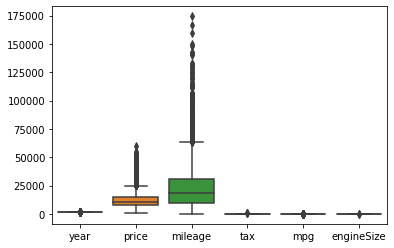

In [ ]:
sns.boxplot(data=df_clean)

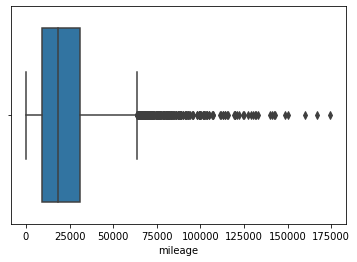

In [ ]:
sns.boxplot(data=df_clean, x='mileage')

In [ ]:
!pip install datasist

In [ ]:
import datasist as ds

# **PREPROCESSING **

In [ ]:
# Detect all outliers

from datasist.structdata import detect_outliers
out_idx = detect_outliers(df_clean, 0, ['price', 'mileage'])

len(out_idx)

527

In [ ]:
# Drop outliers
df_clean.drop(index = out_idx, inplace=True)
df_clean.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
#there is a space in front of each model name.
df_clean['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Camry', ' Verso-S', ' IQ', ' Urban Cruiser'],
      dtype=object)

In [ ]:
#cleaning the model names
df_clean['model'] = [i.strip()   for i in df_clean['model']]

In [ ]:
df_clean['model'].unique()[:10]

array(['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR',
       'Prius', 'Avensis', 'Verso'], dtype=object)

In [ ]:
df_clean['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [ ]:
df_clean['fuelType'].unique

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [ ]:
df_clean['year'].unique()

array([2016, 2017, 2015, 2019, 2018, 2014, 2020, 2013, 2012, 2011, 2008,
       2004, 2007, 2002, 2009, 2000, 2005, 2010, 2006])

In [ ]:
# converting year column to the suitable data type 'integer'
df_clean['year'] = df_clean['year'].convert_dtypes() 
df_clean['year'].dtype

Int64Dtype()

Visualization

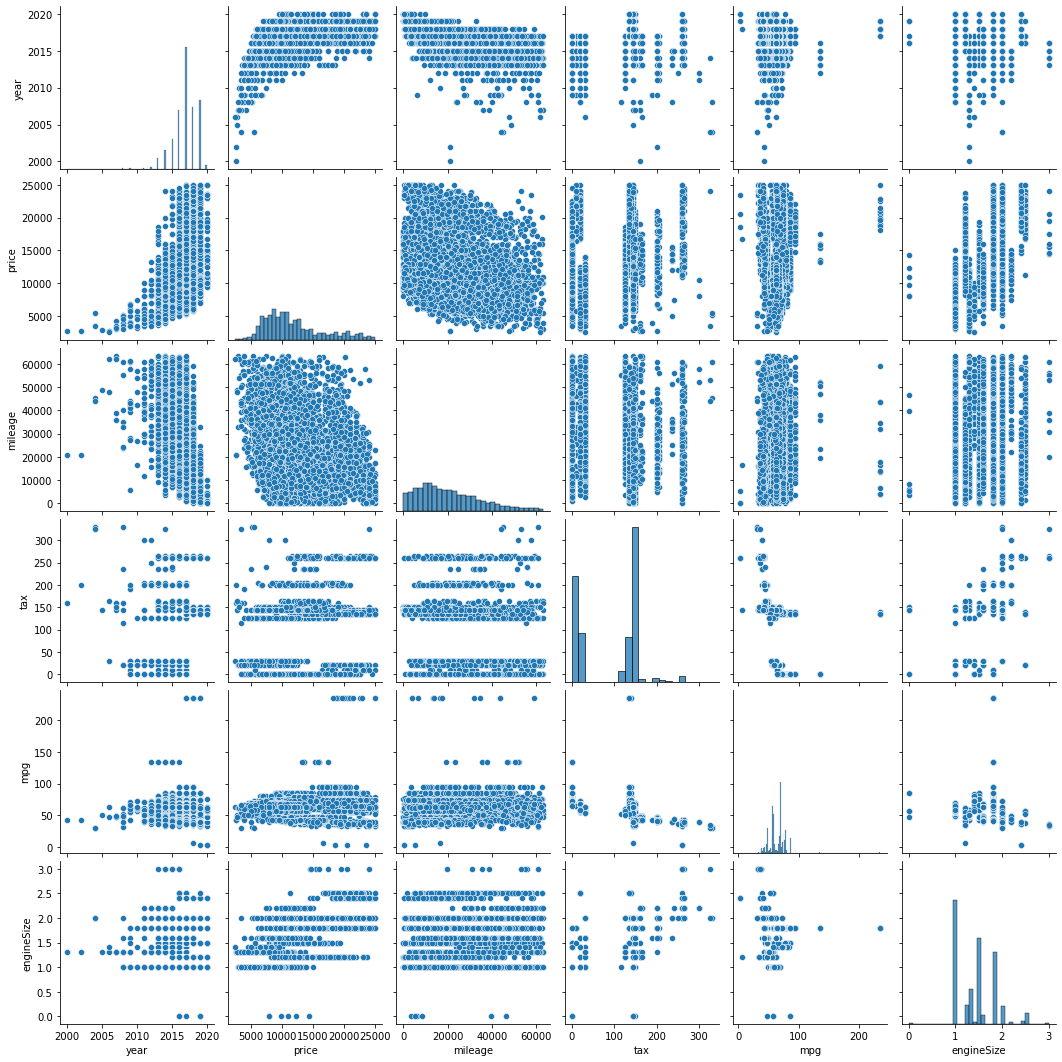

In [ ]:
sns.pairplot(df_clean)

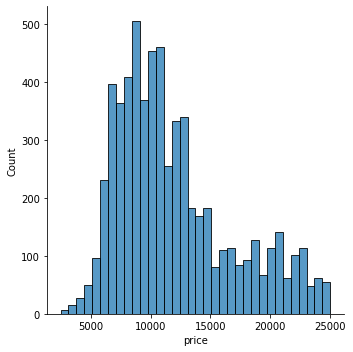

In [ ]:
sns.displot(data=df_clean,  x='price')

[Text(0, 0, '2000'),
 Text(0, 0, '2002'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

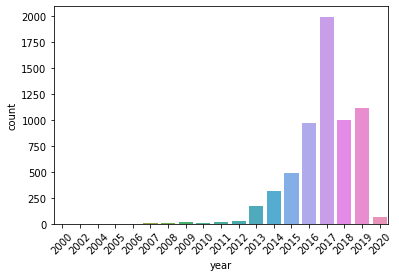

In [ ]:
ax=sns.countplot(data=df_clean, x='year')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

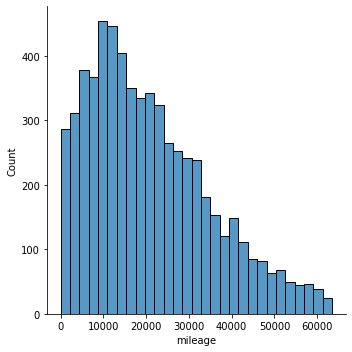

In [ ]:
sns.displot(data=df_clean,  x='mileage')

Banyak mobil yang memiliki kilometer rendah yang dijual

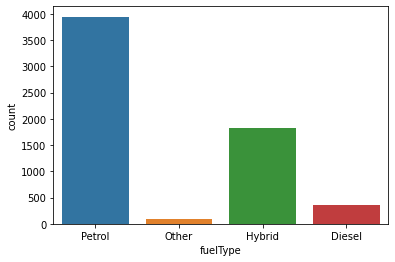

In [ ]:
sns.countplot(data=df_clean, x='fuelType')

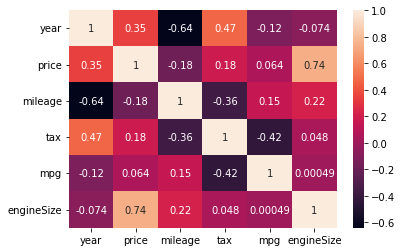

In [ ]:
sns.heatmap(df_clean.corr(), annot=True)

# The most effictive features are year then enginesize then mileage.

Data Preprocessing

In [ ]:
# renaming transmission values

transmition_map = {'Other':0, 'Manual':1, 'Semi-Auto':2, 'Automatic':3}

df_clean['transmission'] = df_clean['transmission'].map(transmition_map)
df_clean.transmission.unique()

array([nan])

In [ ]:
df_clean = pd.get_dummies(df_clean, columns=['model','transmission', 'fuelType'])
df_clean.head()

,year,price,mileage,tax,mpg,engineSize,model_Auris,model_Avensis,model_Aygo,model_C-HR,...,model_Prius,model_RAV4,model_Urban Cruiser,model_Verso,model_Verso-S,model_Yaris,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2017,18998,14736,150,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2017,17498,36284,145,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols=['year','price','mileage','tax','mpg', 'engineSize']
df_clean[cols]=scaler.fit_transform(df_clean[cols])
df_clean.head()

,year,price,mileage,tax,mpg,engineSize,model_Auris,model_Avensis,model_Aygo,model_C-HR,...,model_Prius,model_RAV4,model_Urban Cruiser,model_Verso,model_Verso-S,model_Yaris,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.498966,0.830010,0.227449,2.433016,-1.913824,1.451416,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.068215,0.828982,-0.158245,0.750155,-1.913824,1.451416,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.066147,0.418323,0.465601,2.433016,-1.913824,1.451416,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.068215,1.446512,-0.431556,0.820274,-1.913824,1.451416,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.068215,1.138055,1.086699,0.750155,-1.913824,1.451416,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

x = df_clean.drop('price', axis=1)
y = df_clean[['price']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)

In [ ]:
x_train.shape

(4968, 26)

Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [ ]:
models = {'LR' : LinearRegression(), 
          'DT' : DecisionTreeRegressor(), 
          'RF' : RandomForestRegressor(), 
          'XGB' : XGBRegressor(), 
          'KNN' : KNeighborsRegressor()}

In [ ]:
for name, model in models.items() :
    print(name)
    print('-'*10)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    ## score 
    print('Train Score', r2_score(y_train, model.predict(x_train)))
    print('Validation Score', r2_score(y_test, y_pred))
    print('='*50)

LR
----------
Train Score 0.9404430417361201
Validation Score 0.9430566099325092
DT
----------
Train Score 0.9996902952297961
Validation Score 0.9301684983372656
RF
----------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train Score 0.9928869794990921
Validation Score 0.949956497470231
XGB
----------
[02:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score 0.9561627093819779
Validation Score 0.9480895829671278
KNN
----------
Train Score 0.9660905091722175
Validation Score 0.9488143579474263


Random Forest

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
r2_score(y_train, model.predict(x_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9929816003980982

In [ ]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.949107626155226